### <font color='blue'> Hypothesis: individual desing choices are common accross many designers but  design choices are unique for a designer </font>

### <font color='blue'> Import Libraries</font>

In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
from itertools import permutations
from autogluon import TabularPrediction as task
%matplotlib inline
sns.set()

### <font color='blue'> Data Path</font>

In [19]:
DATA_DIR="../Downloads/dna/"

### <font color='blue'> Read the data </font>

In [20]:
train_values = pd.read_csv(DATA_DIR +'train_values.csv', index_col='sequence_id')
train_labels = pd.read_csv(DATA_DIR + 'train_labels.csv', index_col='sequence_id')
test_values = pd.read_csv(DATA_DIR + 'test_values.csv', index_col='sequence_id')

### <font color='blue'> Explotary Data Analysis </font>
#### <font color= 'blue'> Training data</font>

In [21]:
train_values.head()

,sequence,bacterial_resistance_ampicillin,bacterial_resistance_chloramphenicol,bacterial_resistance_kanamycin,bacterial_resistance_other,bacterial_resistance_spectinomycin,copy_number_high_copy,copy_number_low_copy,copy_number_unknown,growth_strain_ccdb_survival,...,species_budding_yeast,species_fly,species_human,species_mouse,species_mustard_weed,species_nematode,species_other,species_rat,species_synthetic,species_zebrafish
sequence_id,,,,,,,,,,,,,,,,,,,,,
9ZIMC,CATGCATTAGTTATTAATAGTAATCAATTACGGGGTCATTAGTTCA...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5SAQC,GCTGGATGGTTTGGGACATGTGCAGCCCCGTCTCTGTATGGAGTGA...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
E7QRO,NNCCGGGCTGTAGCTACACAGGGCGGAGATGAGAGCCCTACGAAAG...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
CT5FP,GCGGAGATGAAGAGCCCTACGAAAGCTGAGCCTGCGACTCCCGCAG...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7PTD8,CGCGCATTACTTCACATGGTCCTCAAGGGTAACATGAAAGTGATCC...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63017 entries, 9ZIMC to U5MR3
Data columns (total 40 columns):
sequence                                63017 non-null object
bacterial_resistance_ampicillin         63017 non-null float64
bacterial_resistance_chloramphenicol    63017 non-null float64
bacterial_resistance_kanamycin          63017 non-null float64
bacterial_resistance_other              63017 non-null float64
bacterial_resistance_spectinomycin      63017 non-null float64
copy_number_high_copy                   63017 non-null float64
copy_number_low_copy                    63017 non-null float64
copy_number_unknown                     63017 non-null float64
growth_strain_ccdb_survival             63017 non-null float64
growth_strain_dh10b                     63017 non-null float64
growth_strain_dh5alpha                  63017 non-null float64
growth_strain_neb_stable                63017 non-null float64
growth_strain_other                     63017 non-null float64
growth_stra

###### <font color='red'> There is no missing values</font>

### <font color='blue'> Sequence Length Distribution</font>

In [23]:
sequence_lengths = train_values.sequence.apply(len)
sequence_lengths.describe()

count    63017.000000
mean      4839.025501
std       3883.148431
min         20.000000
25%        909.000000
50%       4741.000000
75%       7490.000000
max      60099.000000
Name: sequence, dtype: float64

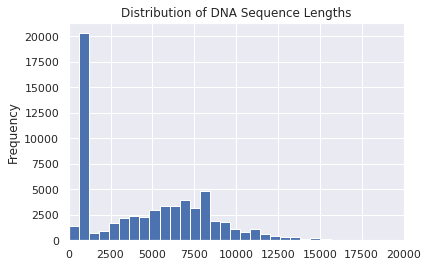

In [24]:
sequence_lengths.plot(
    kind='hist', 
    title='Distribution of DNA Sequence Lengths', 
    bins=100,
    xlim=(0, 20000))

### <font color='blue'> One hot encoded features </font>

In [25]:
train_values.iloc[:, 1:].apply(pd.value_counts)

,bacterial_resistance_ampicillin,bacterial_resistance_chloramphenicol,bacterial_resistance_kanamycin,bacterial_resistance_other,bacterial_resistance_spectinomycin,copy_number_high_copy,copy_number_low_copy,copy_number_unknown,growth_strain_ccdb_survival,growth_strain_dh10b,...,species_budding_yeast,species_fly,species_human,species_mouse,species_mustard_weed,species_nematode,species_other,species_rat,species_synthetic,species_zebrafish
0.0,19590,60506,48706,62078,58592,18750,57313,50059,61841,61285,...,61417,61478,36890,57732,61978,62322,56381,61949,55170,61742
1.0,43427,2511,14311,939,4425,44267,5704,12958,1176,1732,...,1600,1539,26127,5285,1039,695,6636,1068,7847,1275


### <font color='blue'> Common features accross sequences</font>

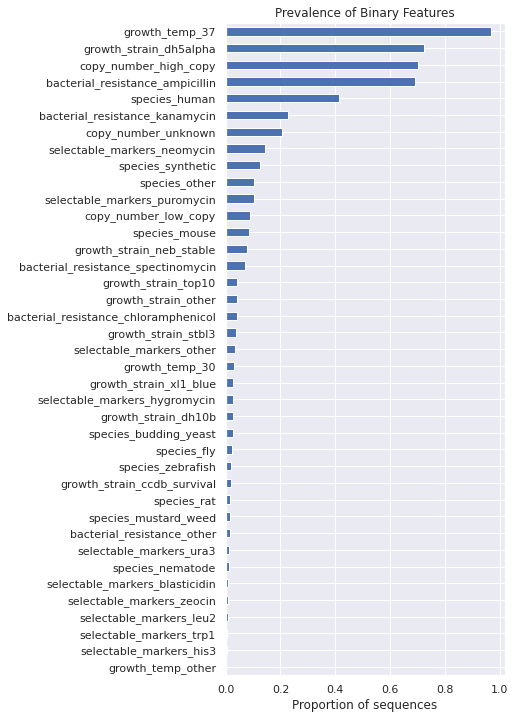

In [26]:
sorted_binary_features = train_values.iloc[:, 1:].mean().sort_values()

ax = sorted_binary_features.plot(kind='barh',
                                 stacked=True,
                                 figsize=(5, 12),
                                 title='Prevalence of Binary Features')
ax.set_xlabel('Proportion of sequences');

#### <font color='blue'> Test dataset</font>

In [27]:
test_values.head()

,sequence,bacterial_resistance_ampicillin,bacterial_resistance_chloramphenicol,bacterial_resistance_kanamycin,bacterial_resistance_other,bacterial_resistance_spectinomycin,copy_number_high_copy,copy_number_low_copy,copy_number_unknown,growth_strain_ccdb_survival,...,species_budding_yeast,species_fly,species_human,species_mouse,species_mustard_weed,species_nematode,species_other,species_rat,species_synthetic,species_zebrafish
sequence_id,,,,,,,,,,,,,,,,,,,,,
E0VFT,AGATCTATACATTGAATCAATATTGGCAATTAGCCATATTAGTCAT...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
TTRK5,GCGCGCGTTGACATTGATTATTGACTAGTTATTAATAGTAATCAAT...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2Z7FZ,GCTTAAGCGGTCGACGGATCGGGAGATCTCCCGATCCCCTATGGTG...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VJI6E,ATGATGATGATGTCCCTGAACAGCAAGCAGGCGTTTAGCATGCCGC...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
721FI,GGTACCGAGCTCTTACGCGTGCTAGCCATACTATCAGCCACTTGTG...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### <font color='blue'> Test sequence length distribution </font>

In [28]:
test_values.head()

,sequence,bacterial_resistance_ampicillin,bacterial_resistance_chloramphenicol,bacterial_resistance_kanamycin,bacterial_resistance_other,bacterial_resistance_spectinomycin,copy_number_high_copy,copy_number_low_copy,copy_number_unknown,growth_strain_ccdb_survival,...,species_budding_yeast,species_fly,species_human,species_mouse,species_mustard_weed,species_nematode,species_other,species_rat,species_synthetic,species_zebrafish
sequence_id,,,,,,,,,,,,,,,,,,,,,
E0VFT,AGATCTATACATTGAATCAATATTGGCAATTAGCCATATTAGTCAT...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
TTRK5,GCGCGCGTTGACATTGATTATTGACTAGTTATTAATAGTAATCAAT...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2Z7FZ,GCTTAAGCGGTCGACGGATCGGGAGATCTCCCGATCCCCTATGGTG...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VJI6E,ATGATGATGATGTCCCTGAACAGCAAGCAGGCGTTTAGCATGCCGC...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
721FI,GGTACCGAGCTCTTACGCGTGCTAGCCATACTATCAGCCACTTGTG...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### <font color='blue'> Training labels</font>

In [29]:
train_labels.head()

,00Q4V31T,012VT4JK,028IO5W2,03GRNN7N,03Y3W51H,09MQV1TY,0A4AHRCT,0A9M05NC,0B9GCUVV,0CL7QVG8,...,ZQNGGY33,ZSHS4VJZ,ZT1IP3T6,ZU6860XU,ZU6TVFFU,ZU75P59K,ZUI6TDWV,ZWFD8OHC,ZX06ZDZN,ZZJVE4HO
sequence_id,,,,,,,,,,,,,,,,,,,,,
9ZIMC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5SAQC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E7QRO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CT5FP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7PTD8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### <font color='blue'> Create one column for label</font>

In [30]:
lab_ids = pd.DataFrame(train_labels.idxmax(axis=1), columns=['lab_id'])
lab_ids.head()

,lab_id
sequence_id,
9ZIMC,RYUA3GVO
5SAQC,RYUA3GVO
E7QRO,RYUA3GVO
CT5FP,RYUA3GVO
7PTD8,RYUA3GVO


### <font color='blue'>Number of sequence from each lab</font>

In [31]:
lab_ids['lab_id'].value_counts().describe()

count    1314.000000
mean       47.958143
std       262.552258
min         1.000000
25%         9.000000
50%        15.000000
75%        34.000000
max      8286.000000
Name: lab_id, dtype: float64

In [32]:
(lab_ids['lab_id'].value_counts(normalize=True)
        .sort_values(ascending=False)).head()

NumExpr defaulting to 8 threads.


I7FXTVDP    0.131488
RKJHZGDQ    0.043353
GTVTUGVY    0.042401
A18S09P2    0.016884
Q2K8NHZY    0.015440
Name: lab_id, dtype: float64

###### <font color='red'> Classes are inbalanced </font>

### <font color='blue'> Feature Engineering </font>

#### <font color= "blue"> Neucliotide </font>

In [33]:
bases = set(''.join(train_values.sequence.values))
bases

{'A', 'C', 'G', 'N', 'T'}

In [34]:
n = 4
subsequences = [''.join(permutation) for permutation in permutations(bases, r=n)]

In [35]:
print(f"Number of subsequences: {len(subsequences)}")
subsequences[:10]

Number of subsequences: 120


['NTAC',
 'NTAG',
 'NTCA',
 'NTCG',
 'NTGA',
 'NTGC',
 'NATC',
 'NATG',
 'NACT',
 'NACG']

In [36]:
def get_ngram_features(data, subsequences):
    """Generates counts for each subsequence.

    Args:
        data (DataFrame): The data you want to create features from. Must include a "sequence" column.
        subsequences (list): A list of subsequences to count.

    Returns:
        DataFrame: A DataFrame with one column for each subsequence.
    """
    features = pd.DataFrame(index=data.index)
    for subseq in subsequences:
        features[subseq] = data.sequence.str.count(subseq)
    return features

In [37]:
# Calculate n-gram features on our training set
ngram_features = get_ngram_features(train_values, subsequences)
ngram_features.head()

,NTAC,NTAG,NTCA,NTCG,NTGA,NTGC,NATC,NATG,NACT,NACG,...,GATN,GATC,GACN,GACT,GCNT,GCNA,GCTN,GCTA,GCAN,GCAT
sequence_id,,,,,,,,,,,,,,,,,,,,,
9ZIMC,0,0,0,0,0,0,0,0,0,0,...,0,32,0,30,0,0,0,27,0,20
5SAQC,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
E7QRO,0,0,0,0,0,0,0,0,0,0,...,0,1,0,3,0,0,0,1,1,0
CT5FP,0,0,0,0,0,0,0,0,0,0,...,0,7,0,3,0,0,0,3,0,3
7PTD8,0,0,0,0,0,0,0,0,0,0,...,0,3,0,6,0,0,0,2,0,3


In [38]:
ngram_features.shape

(63017, 120)

In [39]:
all_features = ngram_features.join(train_values.drop('sequence', axis=1))

In [40]:
all_features.head()

,NTAC,NTAG,NTCA,NTCG,NTGA,NTGC,NATC,NATG,NACT,NACG,...,species_budding_yeast,species_fly,species_human,species_mouse,species_mustard_weed,species_nematode,species_other,species_rat,species_synthetic,species_zebrafish
sequence_id,,,,,,,,,,,,,,,,,,,,,
9ZIMC,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5SAQC,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
E7QRO,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
CT5FP,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7PTD8,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
all_features.shape

(63017, 159)

In [42]:
def top10_accuracy_scorer(estimator, X, y):
    """A custom scorer that evaluates a model on whether the correct label is in 
    the top 10 most probable predictions.

    Args:
        estimator (sklearn estimator): The sklearn model that should be evaluated.
        X (numpy array): The validation data.
        y (numpy array): The ground truth labels.

    Returns:
        float: Accuracy of the model as defined by the proportion of predictions
               in which the correct label was in the top 10. Higher is better.
    """
    # predict the probabilities across all possible labels for rows in our training set
    probas = estimator.predict_proba(X)
    
    # get the indices for top 10 predictions for each row; these are the last ten in each row
    # Note: We use argpartition, which is O(n), vs argsort, which uses the quicksort algorithm 
    # by default and is O(n^2) in the worst case. We can do this because we only need the top ten
    # partitioned, not in sorted order.
    # Documentation: https://numpy.org/doc/1.18/reference/generated/numpy.argpartition.html
    top10_idx = np.argpartition(probas, -10, axis=1)[:, -10:]
    
    # index into the classes list using the top ten indices to get the class names
    top10_preds = estimator.classes_[top10_idx]

    # check if y-true is in top 10 for each set of predictions
    mask = top10_preds == y.reshape((y.size, 1))
    
    # take the mean
    top_10_accuracy = mask.any(axis=1).mean()
 
    return top_10_accuracy

In [43]:
# Rename our feature array
X = all_features

# Create our labels
y = lab_ids.values.ravel()

In [44]:
y=pd.DataFrame(lab_ids.values.ravel(),columns=['lab_id'],index=lab_ids.index)

In [45]:
data= pd.concat([X,y],axis=1,join='inner')

In [46]:
X.shape

(63017, 159)

In [ ]:
###  data.head()

In [48]:
data = task.Dataset(data) 

In [51]:
label_column='lab_id'

In [52]:
dir = 'model' # specifies folder where to store trained models
predictor = task.fit(train_data=data, label=label_column, output_directory=dir,num_bagging_folds=10,  time_limits=600)

Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to model/
Train Data Rows:    63017
Train Data Columns: 160
Preprocessing data ...
Here are the first 10 unique label values in your data:  ['RYUA3GVO', 'UK4B4I7A', 'YMHGXK99', '9HRDSOST', 'L905DK46', 'YKXRSB4N', 'I7FXTVDP', 'FRX9XJYW', 'JO1WTZOB', 'THW6JGC7']
AutoGluon infers your prediction problem is: multiclass  (because dtype of label-column == object).
If this is wrong, please specify `problem_type` argument in fit() instead (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])

Fraction of data from classes with at least 8 examples that will be kept for training models: 0.9784978656552994
Train Data Class Count: 1088
Feature Generator processed 61662 data points with 159 features
Original Features:
	int features: 120
	float features: 39
	object features: 0
Generated Features:
	int features: 0
All Features:
	int features: 120
	float features: 39
	object features: 0
	Data prepr

In [ ]:
# top10_accuracy_scorer(predictor, X, y)

### <font color='blue'> Time to predict and submit </font>

In [53]:
test_ngram_features = get_ngram_features(test_values, subsequences)
all_test_features = test_ngram_features.join(test_values.drop('sequence', axis=1))

In [54]:
test_data = task.Dataset(all_test_features)

In [55]:
test_data.head()

,NTAC,NTAG,NTCA,NTCG,NTGA,NTGC,NATC,NATG,NACT,NACG,...,species_budding_yeast,species_fly,species_human,species_mouse,species_mustard_weed,species_nematode,species_other,species_rat,species_synthetic,species_zebrafish
sequence_id,,,,,,,,,,,,,,,,,,,,,
E0VFT,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
TTRK5,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2Z7FZ,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VJI6E,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
721FI,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
probas = predictor.predict_proba(test_data,as_pandas=True)

In [57]:
submission_format = pd.read_csv(DATA_DIR + 'submission_format.csv', index_col='sequence_id')

In [58]:
assert submission_format.shape == probas.shape
assert (probas.columns == submission_format.columns).all()

In [59]:
probas.index=test_data.index

In [60]:
probas.head()

,00Q4V31T,012VT4JK,028IO5W2,03GRNN7N,03Y3W51H,09MQV1TY,0A4AHRCT,0A9M05NC,0B9GCUVV,0CL7QVG8,...,ZQNGGY33,ZSHS4VJZ,ZT1IP3T6,ZU6860XU,ZU6TVFFU,ZU75P59K,ZUI6TDWV,ZWFD8OHC,ZX06ZDZN,ZZJVE4HO
sequence_id,,,,,,,,,,,,,,,,,,,,,
E0VFT,4.698374e-12,1.143699e-11,4.071932e-12,0.0,9.456863e-11,5.638033e-12,5.638033e-12,4.698374e-12,1.584117e-10,2.192591e-12,...,3.758710e-12,5.638033e-12,7.240826e-12,2.819040e-12,1.190229e-11,1.847952e-11,2.505816e-12,1.346832e-11,2.192591e-12,1.402690e-01
TTRK5,1.221016e-17,2.971831e-17,1.041991e-17,0.0,2.462231e-16,1.449933e-17,1.473523e-17,1.213085e-17,4.119697e-16,5.700786e-18,...,9.611249e-18,1.449933e-17,1.880232e-17,7.318185e-18,3.110742e-17,4.795076e-17,6.430205e-18,3.501765e-17,5.953024e-18,1.376122e-16
2Z7FZ,6.855748e-06,1.647963e-05,5.485640e-06,0.0,1.382341e-04,7.773433e-06,8.294116e-06,6.856773e-06,2.310909e-04,3.199888e-06,...,5.029625e-06,7.773433e-06,1.051704e-05,4.048218e-06,1.782611e-05,2.690320e-05,3.267115e-06,1.965574e-05,3.656949e-06,7.724275e-05
VJI6E,4.450619e-08,1.067998e-07,3.567800e-08,0.0,8.976267e-07,5.052186e-08,5.346017e-08,4.444493e-08,1.502360e-06,2.077274e-08,...,3.271700e-08,5.052186e-08,6.570323e-08,2.667563e-08,1.128082e-07,1.749762e-07,2.374025e-08,1.247517e-07,2.374025e-08,4.985905e-07
721FI,1.036685e-05,2.662319e-05,8.572075e-06,0.0,2.160119e-04,1.283157e-05,1.319768e-05,1.071504e-05,3.610506e-04,5.000393e-06,...,8.205948e-06,1.283157e-05,1.609807e-05,6.089402e-06,2.748385e-05,4.180449e-05,5.714729e-06,3.068922e-05,5.714729e-06,1.206791e-04


In [61]:
probas.to_csv('submission_auto_gluon.csv')

### <font color='blue'> Reference:  https://www.drivendata.co/blog/genetic-attribution-benchmark/ </font>